<h1><center>Predict the default of Credit Card holder</center></h1>
<h2><center>Group 1: 
Li, Qiao; Shu, Chuyun; Xia, Zhihang; Yu, Shuqi; Yuan, Serena; Zhang, Renyin </center></h2>

# 1. Introduction
This research aimed at the case of customers’ default payments in Taiwan and compares the predictive accuracy of probability of default among different models. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. 

# Context
Our study took payment data in October, 2005, from an
important bank (a cash and credit card issuer) in Taiwan
and the targets were credit card holders of the bank.
Among the total 25,000 observations, 5529 observations
(22.12%) are the cardholders with default payment. This
research employed a binary variable – default payment
(Yes = 1, No = 0), as the response variable.

# Content
Following 23 variables as explanatory variables:
 
 X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
 
 X2: Gender (1 = male; 2 = female).
 
 X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

 X4: Marital status (1 = married; 2 = single; 3 = others).
 
 X5: Age (year).
 
 X6–X11: History of past payment. We tracked the past monthly payment records (from April to September,2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August,2005;...;X11 = the repayment status in April, 2005.
The measurement scale for the repayment status is:
1 = pay duly; 1 = payment delay for one month;2 = payment delay for two months; ...; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
 
 X12–X17: Amount of bill statement (NT dollar).(X12 = amount of bill statement in September,2005; X13 = amount of bill statement in August,2005 ;...; X17 = amount of bill statement in April,2005.)
 
 X18–X23: Amount of previous payment (NT dollar).(X18 = amount paid in September, 2005; X19 = amount paid in August, 2005;...;X23 = amount paid in April,2005.) 

# 2. Set up the environment
First, make sure you have python installed. 

In [ ]:
!python --version

If you don't have python installed - please follow this [link](https://realpython.com/installing-python/) for instructions.

Running the cell below will start the installation of required python libraries, assuming you have python already installed.


In [ ]:
!pip install pandas
!pip install numpy 
!pip install seaborn
!pip install matplotlib
!pip install plotly
!pip install iplot
!pip install seaborn

In [2]:
#import the librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import smote_variants as sv
import imbalanced_databases as imbd
import plotly as py
import plotly.graph_objs as go
from plotly.offline import *
%matplotlib inline
np.random.seed(2021)

## 3 Load Default of Credit Card Clients data
The data was randomly divided into two groups, one for model training and the other to validate the model.

In [6]:
df_credit_raw = pd.read_excel ("../data/default of credit card clients.xls")
print (df_credit_raw.shape)

(30001, 25)


In [7]:
df_credit = df_credit_raw.iloc[1:]
df_credit.set_index("ID", inplace=True)
print(df_credit.shape)
df_credit.head(10)

(30000, 24)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [8]:
# split the data for training purpose

from sklearn.model_selection import train_test_split

X = df_credit.loc[:, df_credit.columns != 'Y']
y = df_credit['Y'].values.astype('int')

X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_train.columns.values

array(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23'], dtype=object)

In [9]:
X_train.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
ID,,,,,,,,,,,,,,,,,,,,,
6671,320000,1,1,2,26,-1,0,0,0,0,...,13917,12125,0,0,1267,1700,243,0,0,220000
12887,200000,1,1,1,40,-1,-1,-1,-1,-1,...,6360,2620,5900,37084,5007,7096,2620,6000,17703,4914
16219,120000,2,1,2,45,0,0,0,0,0,...,87941,89737,95451,97379,3079,3185,3251,7200,3600,3900


## 4. Standardize Features

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_test = ss.transform(X_test)
X_train.agg(['mean','std']).T.sort_values('mean',ascending=False)

,mean,std
X9,2.411645e-15,1.000021
X10,1.560310e-15,1.000021
X7,1.479724e-15,1.000021
X11,1.009262e-15,1.000021
X23,4.436798e-16,1.000021
X15,3.557571e-16,1.000021
X18,2.443323e-16,1.000021
X22,2.128691e-16,1.000021
X20,1.895521e-16,1.000021
X8,1.651642e-16,1.000021


## Feature Selection

In [7]:
# with LASSO
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(C=0.1, penalty="l1", solver="liblinear", random_state=0)
logr.fit(X_train, y_train)
sorted_tuples = sorted(list(zip(X_train.columns.values,logr.coef_[0])),key=lambda x:x[1],reverse=True)
for feature,coef in sorted_tuples:
    print(f'{feature:30s} : {coef: 0.3f}')

print(f'\nColumns to remove: {X_train.columns[logr.coef_[0] == 0]}')

X6                             :  0.640
X7                             :  0.100
X8                             :  0.086
X14                            :  0.078
X13                            :  0.070
X5                             :  0.064
X10                            :  0.058
X16                            :  0.043
X9                             :  0.017
X11                            :  0.011
X15                            :  0.000
X17                            :  0.000
X2                             : -0.045
X23                            : -0.045
X22                            : -0.062
X4                             : -0.070
X21                            : -0.072
X3                             : -0.090
X1                             : -0.099
X20                            : -0.112
X19                            : -0.156
X18                            : -0.235
X12                            : -0.295

Columns to remove: Index(['X15', 'X17'], dtype='object')


In [8]:
# Tree based model feature importance
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=123).fit(X_train,y_train)
rf.feature_importances_ # (normalized) total reduction of function measuring impurity
feature_importances = pd.Series(rf.feature_importances_,index=X_train.columns)
feature_importances.sort_values(ascending=False).round(3)

X6     0.096
X5     0.067
X12    0.060
X1     0.059
X13    0.055
X14    0.052
X16    0.050
X18    0.050
X15    0.050
X17    0.049
X19    0.048
X7     0.047
X20    0.046
X23    0.046
X22    0.044
X21    0.043
X8     0.028
X10    0.022
X3     0.021
X9     0.020
X11    0.020
X4     0.014
X2     0.012
dtype: float64

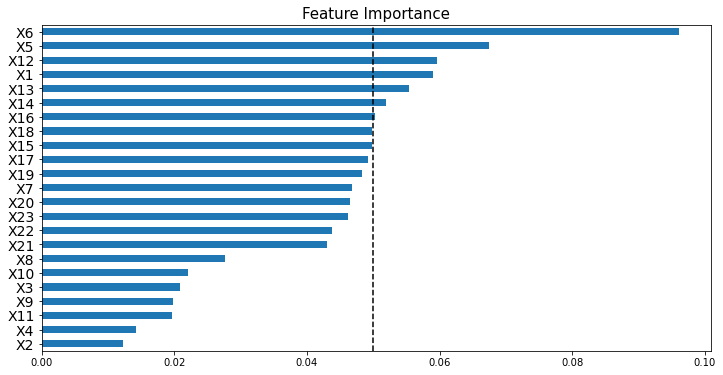

In [9]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
feature_importances.sort_values().plot.barh(ax=ax);
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14);
ax.set_title('Feature Importance', fontsize=15);
plt.axvline(x=0.05, color='k', linestyle='--');

In [10]:
# SelectFromModel
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(logr,threshold=None, prefit=True)
sfm.get_support() # boolean mask of features selected
X_train.columns[sfm.get_support()]
X_train_subset = sfm.transform(X_train)

sfm_rf = SelectFromModel(RandomForestClassifier(), threshold='mean',prefit=False).fit(X_train,y_train)
print(f'select features: {X_train.columns[sfm_rf.get_support()]}')

select features: Index(['X1', 'X5', 'X6', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X23'],
      dtype='object')


In [11]:
# Univariate tests
from sklearn.feature_selection import SelectKBest, f_classif

# select 3 best features
kbest = SelectKBest(score_func=f_classif, k=3).fit(X_train, y_train)
list(X.columns[kbest.get_support()])

['X6', 'X7', 'X8']

In [12]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE

rfe = RFE(LogisticRegression(penalty='none'), n_features_to_select=3, step=1).fit(X_train,y_train)
X_train.columns[rfe.get_support()]

Index(['X6', 'X12', 'X13'], dtype='object')

## Feature Extraction

In [14]:
# Principal Component Analysis
from sklearn.decomposition import PCA

# Fit and transform the X_train to 3d using pca
pca = PCA(n_components=3, random_state=123)
X_train_pca = pca.fit_transform(X_train)
X_train_pca = pd.DataFrame(X_train_pca,columns=['component1','component2','component3'])

# Transform the X_test to 3d using pca
X_test_pca = pca.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca,columns=['component1','component2','component3'])
# Print the ratio of variance explained by each component
print(pca.explained_variance_ratio_)

[0.28435067 0.17862594 0.06936422]


### 5: Build and Evaluate Advanced Model: 

## 6. Other Models

### 6.1 SVM

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV,RepeatedStratifiedKFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import scipy.io
import pickle
import os, sys
from scipy.spatial.distance import pdist
import time 
import xlsxwriter
from sklearn.metrics import accuracy_score, classification_report,make_scorer, confusion_matrix,roc_auc_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
#from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from sklearn import ensemble
from sklearn.svm import SVC
import random
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from keras.layers import BatchNormalization
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam
from keras.utils import to_categorical

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid_svm = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid_svm.fit(X_train,y_train)
print(grid_svm.best_params_)
print(grid_svm.best_estimator_)

In [26]:
#Train SVM using best parameters
svm_best = SVC(C=10,gamma=0.01,kernel='rbf',probability=True) 
start_time=time.time()
svm_best.fit(X_train, y_train)

print("Training  model takes %s seconds" % round((time.time() - start_time),3))
print('Accuracy of SVM on test set: {:.3f}'.format(svm_best.score(X_test,y_test)))

start = time.time()
svm_pred = svm_best.predict(X_test)
end = time.time()

svm_predprob = svm_best.predict_proba(X_test)[:,1]

print("Predicting test data takes %s seconds" % round((end - start),3))
print('Classification error rate:', np.mean(np.array(y_test)!= svm_pred))
print('Classification report \n', classification_report(y_test, svm_pred))

print('Confusion Matrix \n', confusion_matrix(y_test, svm_pred))
print('AUC is: {:.4f}'.format(roc_auc_score(y_test, svm_predprob)))

Training  model takes 435.366 seconds
Accuracy of SVM on test set: 0.821
Predicting test data takes 18.239 seconds
Classification error rate: 0.17866666666666667
Classification report 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.72      0.32      0.44      1327

    accuracy                           0.82      6000
   macro avg       0.78      0.64      0.67      6000
weighted avg       0.81      0.82      0.79      6000

Confusion Matrix 
 [[4509  164]
 [ 908  419]]
AUC is: 0.7253


In [34]:
#Save trained SVM model
pickle.dump(svm_best, open("../output/best_svm.p",'wb'))
#Load SVM balanced model
pickle.load(open("../output/best_svm.p",'rb'))

SVC(C=10, gamma=0.01, probability=True)

### 6.2 Weighted SVM

In [25]:
def fine_tune_svm():
    weighted_svm = SVC(gamma = 'scale', class_weight = 'balanced')

    #CV Weighted SVM 
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(weighted_svm, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    # summarize performance
    print('Mean ROC AUC: %.3f' % np.mean(scores))

    # parameter space for the model
    param_grid = {
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']} 

    grid_svm = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
    grid_svm.fit(X_train,y_train)
    
    print(grid_svm.best_params_)
    print(grid_svm.best_estimator_)
    
    balance = [{0:598.0, 1:2402.0},{0:1,1:100}, {0:1,1:10}, {0:1,1:1}, {0:10,1:1}, {0:100,1:1}]
    param_grid = dict(class_weight=balance)

    grid_weightedsvm = GridSearchCV(estimator=weighted_svm, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
    grid_weightedsvm.fit(X_train, y_train)
    grid_weightedsvm.best_params_
    grid_weightedsvm.best_estimator_
    grid_weightedsvm.best_params_
    grid_weightedsvm.best_estimator_
    
    print("Best: %f using %s" % (grid_weightedsvm.best_score_, grid_weightedsvm.best_params_))
    
    # report all configurations
    means = grid_weightedsvm.cv_results_['mean_test_score']
    stds = grid_weightedsvm.cv_results_['std_test_score']
    params = grid_weightedsvm.cv_results_['params']
    
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

In [18]:
 fine_tune_svm()

Mean ROC AUC: 0.758
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time= 2.9min
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time= 2.8min
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time= 2.5min
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time= 2.8min
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time= 2.5min
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time= 1.1min
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  54.4s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  52.1s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  52.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time= 1.1min
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=  58.4s
[CV 2/5] END ..............

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time= 3.9min
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time= 4.2min
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time= 3.9min
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time= 4.6min
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=14.0min
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=10.2min
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=10.6min
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=11.1min
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=10.8min
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=10.0min
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time= 9.0min
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time= 8.5min
[CV 4/5] END ...............

In [32]:
weighted_svm_best = SVC(
        gamma = 'scale',
        class_weight = {
            0: 1, 
            1: 1
        },
        probability=True
    )
start1 = time.time()
    
    # fit svm model
weighted_svm_best.fit(X_train, y_train)
    
print("Training  model takes %s seconds" % round((time.time() - start1),3))
print('Testing Accuracy of weighted SVM on test set: {:.3f}'
          .format(weighted_svm_best.score(X_test,y_test)))
    
start = time.time()
    
    # make prediction
weighted_svm_pred = weighted_svm_best.predict(X_test)
    
end = time.time()

weighted_svm_predprob = weighted_svm_best.predict_proba(X_test)[:,1]

print("Predicting test data takes %s seconds" % round((end - start),3))
print('Classification error rate:', np.mean(np.array(y_test) != weighted_svm_pred))
print('Classification report \n', classification_report(y_test, weighted_svm_pred))

print('Confusion Matrix \n', confusion_matrix(y_test, weighted_svm_pred))
print('AUC is: {:.4f}'.format(roc_auc_score(y_test, weighted_svm_predprob)))


Training  model takes 366.52 seconds
Testing Accuracy of weighted SVM on test set: 0.821
Predicting test data takes 12.705 seconds
Classification error rate: 0.1795
Classification report 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.70      0.33      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.77      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000

Confusion Matrix 
 [[4486  187]
 [ 890  437]]
AUC is: 0.7271


In [33]:
#Save Advanced Model
pickle.dump(weighted_svm_best, open("../output/best_weighted_svm.p",'wb'))

#Load weighted SVM model
pickle.load(open("../output/best_weighted_svm.p",'rb'))

SVC(class_weight={0: 1, 1: 1}, probability=True)